### Twitter Sentiment Analysis on Dior'show at Paris Fashion Week Fall 2022


#### INTRODUCTION
Blackpink Jisoo is making the headlines after her stunning appearance for Dior’s show at the Paris Fashion Week Fall 2022. The Snowdrop star attended Dior’s event for the second year in a row.

In this project, we specifically aim to perform sentiment analysis on the official tweets use during the campaign which is #JISOOxDiorAW22 and answer the following research questions:
1)What are the sentiments of global tweets about Jisso appearance for Dior's show?
2)What are the dominant topics discussed on Twitter about her appearance at the Paris Fashion Week Fall 2022?

In [ ]:
!pip install snscrape
!pip install textblob
!pip install tweepy
!pip install emot
!pip install googletrans

In [1]:
from textblob import TextBlob 
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
import matplotlib.pyplot as plt
import snscrape.modules.twitter as sntwitter
import pandas as pd
import tweepy as tw
import pandas as pd 
import re

## DATA COLLECTION 


### Scrape tweets under #JISOOxDiorAW22 using snscrape

In [2]:
# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#JISOOxDiorAW22 lang:en since:2022-03-01 until:2022-03-04').get_items()):
    if i>3000:
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.content])
    
# Creating a dataframe from the tweets list above
tweet_df = pd.DataFrame(tweets_list2, columns=['date', 'Id', 'text'])

In [3]:
#View 5 first row in dataframe
tweet_df.head()

,date,Id,text
0,2022-03-03 00:36:48+00:00,1499181964280344577,Our #JISOO ranked No. 1 on Big Data Actor Bran...
1,2022-03-03 00:32:36+00:00,1499180906560761861,See this Instagram post by @ https://t.co/dRQZ...
2,2022-03-03 00:29:57+00:00,1499180239523807233,#DiorAW22 attend by our #BlackPink's #JISOOxDi...
3,2022-03-03 00:28:14+00:00,1499179808173006848,@EliteDaily @BLACKPINK Jisoo main event\n\nJIS...
4,2022-03-03 00:27:40+00:00,1499179666384756737,Words is not enough to describe her beauty 💖\n...


In [4]:
#Check for missing value 
tweet_df.isnull().sum()

date    0
Id      0
text    0
dtype: int64

### Data Cleaning


In [5]:
# Function for removing hyperlinks, user mentions, user retweet, hashtag and cariage return
def cleanTxt(text):
    text = re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)','', text) #remove @mention 
    text = re.sub(r'RT[\s]+', '', text) #remove RT
    text = re.sub(r'https?:\/\/\S+', '', text) #remove hyper link 
    text = re.sub(r'\n','', text) #remove cariage return
    
    return text


In [6]:
# Function for converting emojis into word
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text

In [13]:
#Update columns with new functions
tweet_df['text'] = tweet_df['text'].apply(cleanTxt)
tweet_df['text'] = tweet_df['text'].apply(convert_emojis)
tweet_df['time'] = pd.to_datetime(tweet_df['date']).dt.hour
tweet_df['text'] = tweet_df['text'].str.lower()

tweet_df

,date,Id,text,time
0,2022-03-03 00:36:48+00:00,1499181964280344577,our jisoo ranked no 1 on big data actor brand ...,0
1,2022-03-03 00:32:36+00:00,1499180906560761861,see this instagram post by jisoo at pfw jiso...,0
2,2022-03-03 00:29:57+00:00,1499180239523807233,dioraw22 attend by our blackpinks jisooxdioraw...,0
3,2022-03-03 00:28:14+00:00,1499179808173006848,jisoo main eventjisoo at pfw jisooxdioraw22,0
4,2022-03-03 00:27:40+00:00,1499179666384756737,words is not enough to describe her beauty jis...,0
...,...,...,...,...
2996,2022-03-02 06:30:44+00:00,1498908648327708674,jisoo recognized wrong personjisoo at pfw ji...,6
2997,2022-03-02 06:30:44+00:00,1498908645320695812,jisoo fulfill my biggest wishjisoo at pfwjiso...,6
2998,2022-03-02 06:30:37+00:00,1498908619047272449,oh myyyyjisoo at pfw jisooxdioraw22,6
2999,2022-03-02 06:30:35+00:00,1498908609383890946,sunscreenjisoo at pfwjisooxdioraw22,6


In [17]:
#Remove stopwords 
from nltk.corpus import stopwords
stop = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stop))
tweet_df['text'] = tweet_df['text'].str.replace(pat, '')
tweet_df['text'] = tweet_df['text'].str.replace(r'\s+', ' ')

#Remove collection words
remove_words = ["kim", "jisoo", "kimjisoo", "jisooxdioraw22", "pfw","chu", "dior", "jisoojisoo", "xaw22", "aw22", "x"]
pat2 = '|'.join(remove_words)
tweet_df['text'] = tweet_df['text'].str.replace(pat2, '')

tweet_df

C:\Users\safin\AppData\Local\Temp/ipykernel_7456/221723879.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df['text'] = tweet_df['text'].str.replace(pat, '')
C:\Users\safin\AppData\Local\Temp/ipykernel_7456/221723879.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df['text'] = tweet_df['text'].str.replace(r'\s+', ' ')
C:\Users\safin\AppData\Local\Temp/ipykernel_7456/221723879.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df['text'] = tweet_df['text'].str.replace(pat2, '')


,date,Id,text,time
0,2022-03-03 00:36:48+00:00,1499181964280344577,ranked 1 big data actor brand value top star ...,0
1,2022-03-03 00:32:36+00:00,1499180906560761861,see instagram post,0
2,2022-03-03 00:29:57+00:00,1499180239523807233,attend blackpinks filipina actress model hea...,0
3,2022-03-03 00:28:14+00:00,1499179808173006848,main event,0
4,2022-03-03 00:27:40+00:00,1499179666384756737,words enough describe beauty paris,0
...,...,...,...,...
2996,2022-03-02 06:30:44+00:00,1498908648327708674,recognized wrong person,6
2997,2022-03-02 06:30:44+00:00,1498908645320695812,fulfill biggest wish,6
2998,2022-03-02 06:30:37+00:00,1498908619047272449,oh myyyy,6
2999,2022-03-02 06:30:35+00:00,1498908609383890946,sunscreen,6


### Sentiment Analysis

In [18]:
#Create a function to get subjectivity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 

#Create a function to get the polarity 
def getPolarity(text):
    return TextBlob(text).sentiment.polarity 

#Create two new columns 
tweet_df['Subjectivity'] =tweet_df['text'].apply(getSubjectivity)
tweet_df['Polarity'] =tweet_df['text'].apply(getPolarity)

#Show the dataframe with new columns 
tweet_df

,date,Id,text,time,Subjectivity,Polarity
0,2022-03-03 00:36:48+00:00,1499181964280344577,ranked 1 big data actor brand value top star ...,0,0.533333,0.433333
1,2022-03-03 00:32:36+00:00,1499180906560761861,see instagram post,0,0.000000,0.000000
2,2022-03-03 00:29:57+00:00,1499180239523807233,attend blackpinks filipina actress model hea...,0,1.000000,0.800000
3,2022-03-03 00:28:14+00:00,1499179808173006848,main event,0,0.333333,0.166667
4,2022-03-03 00:27:40+00:00,1499179666384756737,words enough describe beauty paris,0,0.500000,0.000000
...,...,...,...,...,...,...
2996,2022-03-02 06:30:44+00:00,1498908648327708674,recognized wrong person,6,0.900000,-0.500000
2997,2022-03-02 06:30:44+00:00,1498908645320695812,fulfill biggest wish,6,0.000000,0.000000
2998,2022-03-02 06:30:37+00:00,1498908619047272449,oh myyyy,6,0.000000,0.000000
2999,2022-03-02 06:30:35+00:00,1498908609383890946,sunscreen,6,0.000000,0.000000


In [19]:
#Create a function to compute the negative, neutral and positive analysis 
def getAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

tweet_df['Analysis'] = tweet_df['Polarity'].apply(getAnalysis)
    
tweet_df


,date,Id,text,time,Subjectivity,Polarity,Analysis
0,2022-03-03 00:36:48+00:00,1499181964280344577,ranked 1 big data actor brand value top star ...,0,0.533333,0.433333,Positive
1,2022-03-03 00:32:36+00:00,1499180906560761861,see instagram post,0,0.000000,0.000000,Neutral
2,2022-03-03 00:29:57+00:00,1499180239523807233,attend blackpinks filipina actress model hea...,0,1.000000,0.800000,Positive
3,2022-03-03 00:28:14+00:00,1499179808173006848,main event,0,0.333333,0.166667,Positive
4,2022-03-03 00:27:40+00:00,1499179666384756737,words enough describe beauty paris,0,0.500000,0.000000,Neutral
...,...,...,...,...,...,...,...
2996,2022-03-02 06:30:44+00:00,1498908648327708674,recognized wrong person,6,0.900000,-0.500000,Negative
2997,2022-03-02 06:30:44+00:00,1498908645320695812,fulfill biggest wish,6,0.000000,0.000000,Neutral
2998,2022-03-02 06:30:37+00:00,1498908619047272449,oh myyyy,6,0.000000,0.000000,Neutral
2999,2022-03-02 06:30:35+00:00,1498908609383890946,sunscreen,6,0.000000,0.000000,Neutral


<function matplotlib.pyplot.show(close=None, block=None)>

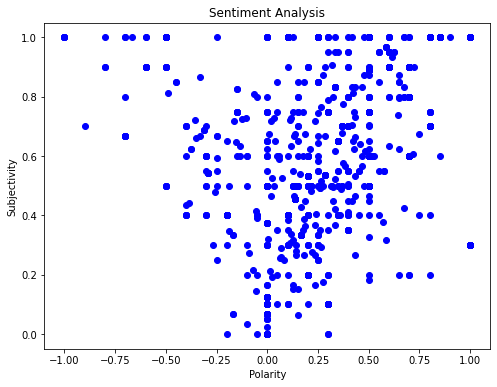

In [21]:
#Plot the polarity and subjectivity 
plt.figure(figsize=(8,6))
for i in range(0, tweet_df.shape[0]):
    plt.scatter(tweet_df['Polarity'][i], tweet_df['Subjectivity'][i] , color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show 

#### From the graph above, we can see the overall sentiment polarity was dominantly neutral followed by positive and negative.

In [22]:
#Get the percentage of positive tweets 
percent = tweet_df[tweet_df.Analysis == 'Positive']
percent = percent['text']

round((percent.shape[0] / tweet_df.shape[0]) * 100, 1)

36.8

In [23]:
#Get the percentage of negative tweets 
percent = tweet_df[tweet_df.Analysis == 'Negative']
percent = percent['text']

round((percent.shape[0] / tweet_df.shape[0]) * 100, 1)

5.0

In [24]:
#Get the percentage of neutral tweets 
percent = tweet_df[tweet_df.Analysis == 'Neutral']
percent = percent['text']

round((percent.shape[0] / tweet_df.shape[0]) * 100, 1)

58.2

### Negative Sentiment

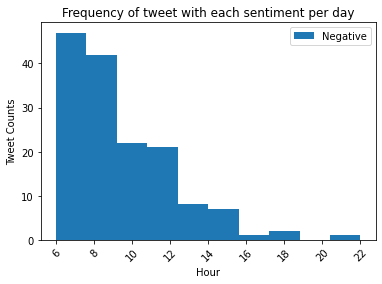

In [25]:
#Plot the sentiment analysis over time 
negative = tweet_df["time"][tweet_df["Analysis"] == "Negative"]
plt.hist([negative],label=["Negative"])
plt.legend()
plt.title("Frequency of tweet with each sentiment per day")
plt.xlabel("Hour")
plt.xticks(rotation=45)
plt.ylabel("Tweet Counts")
plt.show()

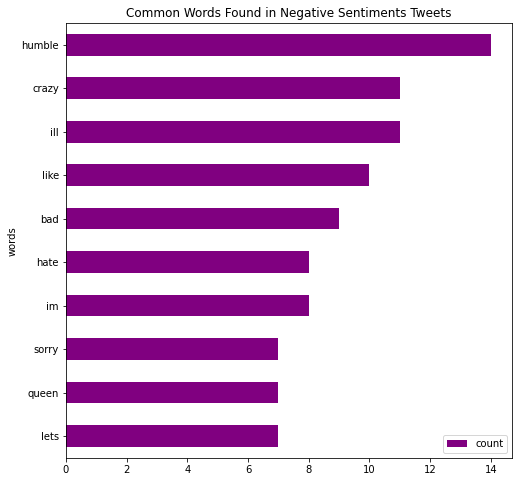

In [28]:
#Common words for negative sentiments 
from collections import Counter
negative_tweets = Counter(" ".join(tweet_df["text"][tweet_df["Analysis"] == "Negative"]).split()).most_common(10)
negative_tweets2 = pd.DataFrame(negative_tweets,columns = ['words', 'count'])

# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 8))
negative_tweets2.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Negative Sentiments Tweets")

plt.show()

### Positive Sentiment 

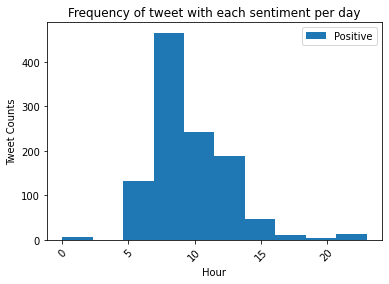

In [30]:
#Plot the sentiment analysis over time 
positive = tweet_df["time"][tweet_df["Analysis"] == "Positive"]
plt.hist([positive],label=["Positive"])
plt.legend()
plt.title("Frequency of tweet with each sentiment per day")
plt.xlabel("Hour")
plt.xticks(rotation=45)
plt.ylabel("Tweet Counts")
plt.show()

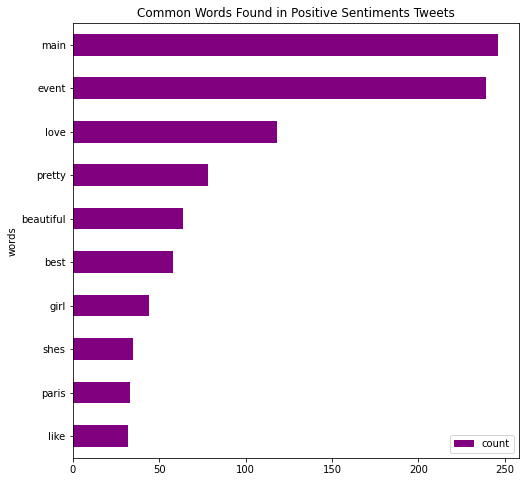

In [31]:
#Common words for negative sentiments 
negative_tweets = Counter(" ".join(tweet_df["text"][tweet_df["Analysis"] == "Positive"]).split()).most_common(10)
negative_tweets2 = pd.DataFrame(negative_tweets,columns = ['words', 'count'])

# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 8))
negative_tweets2.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Positive Sentiments Tweets")

plt.show()

### Neutral Sentiment

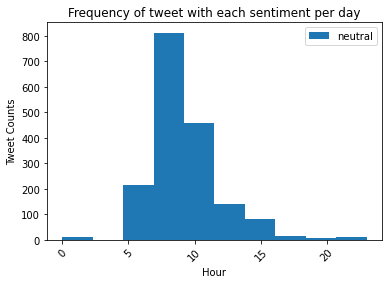

In [33]:
#Plot the sentiment analysis over time 
neutral = tweet_df["time"][tweet_df["Analysis"] == "Neutral"]
plt.hist([neutral],label=["neutral"])
plt.legend()
plt.title("Frequency of tweet with each sentiment per day")
plt.xlabel("Hour")
plt.xticks(rotation=45)
plt.ylabel("Tweet Counts")
plt.show()

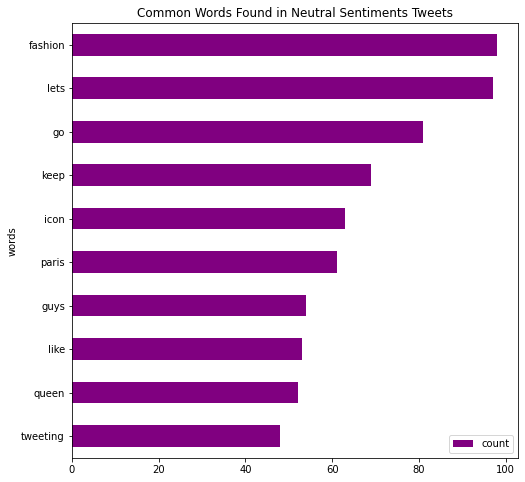

In [ ]:
#Common words for negative sentiments 
negative_tweets = Counter(" ".join(tweet_df["text"][tweet_df["Analysis"] == "Neutral"]).split()).most_common(10)
negative_tweets2 = pd.DataFrame(negative_tweets,columns = ['words', 'count'])

# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 8))
negative_tweets2.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Neutral Sentiments Tweets")

plt.show()

## Conclusion 
### We used the sentiments returned from the TextBlob based classifier to find correlations between real-life events and sentiment changes throughout the whole period. From our analysis, we discovered an increase in tweets about her appearance 7 hour after the event. In short, we found that the overall sentiment polarity was dominantly positive. 